In [53]:
import pandas as pd
import itertools
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.metrics import classification_report, confusion_matrix

import matplotlib.pyplot as plt
import numpy as np

#load data labels and RDkit fingerprints
#naively assign data for all proteins to one giant array
f1 = pd.read_csv('TMPRSS11D_processed.csv')
f2 = pd.read_csv('ST14_processed.csv')
f3 = pd.read_csv('TMPRSS6_processed.csv')
fp1 = np.load('TMPRSS11D_fingerprints.npz')
fp2 = np.load('ST14_fingerprints.npz')
fp3 = np.load('TMPRSS6_fingerprints.npz')
features=pd.concat([f1, f2, f3])

In [4]:
features.head(5) #inspect data
fps_merged = []
ac_merged = []
activity=[]
#function to merge npz arrays
def merge_keys(in_xarray, in_yarray, in_y2array, in_fp, in_data):
     for i in range(len(in_fp.keys())):
            acval=in_data.loc[in_data['cid']==int(list(in_fp.keys())[i]), 'acvalue'].iloc[0]
            active=in_data.loc[in_data['cid']==int(list(in_fp.keys())[i]), 'activity'].iloc[0]
            in_yarray.append(acval)
            in_xarray.append(in_fp[list(in_fp.keys())[i]])
            if active == 'Active':
                in_y2array.append(1)
            else:
                in_y2array.append(0)
     return in_xarray, in_yarray, in_y2array
            

In [5]:
fps_merged, ac_merged, activity=merge_keys(fps_merged, ac_merged, activity, fp1, features)
fps_merged, ac_merged, activity=merge_keys(fps_merged, ac_merged, activity, fp2, features)
fps_merged, ac_merged, activity=merge_keys(fps_merged, ac_merged, activity, fp3, features)

In [ ]:
#UNUSED #NOT RUN 
def chars_to_ints(char_array):
    int_array=[int(s) for s in itertools.islice(char_array,1,len(char_array)-1,2)]
    int_array=np.asarray(int_array)
    return int_array
#NOT RUN

In [6]:
#split training and test set, keep random_state to be an integer for reproducibility
#train the forest (this can take a while)
#in the example, about 2/3 go to training and 1/3 go to test
X_train, X_test, y_train, y_test = train_test_split(fps_merged,activity, test_size=0.33, random_state=39)
rf=RandomForestClassifier(verbose=2, n_estimators=50, random_state=111)
rf.fit(np.asarray(X_train), np.asarray(y_train))

building tree 1 of 50
building tree 2 of 50
building tree 3 of 50
building tree 4 of 50
building tree 5 of 50
building tree 6 of 50
building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50
building tree 14 of 50
building tree 15 of 50
building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50
building tree 20 of 50
building tree 21 of 50
building tree 22 of 50
building tree 23 of 50
building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50
building tree 35 of 50
building tree 36 of 50
building tree 37 of 50
building tree 38 of 50
building tree 39 of 50
building tree 40 of 50
building tree 41 of 50
building tree 42 of 50
building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=111,
                       verbose=2, warm_start=False)

In [50]:
y_pred=rf.predict(X_test)
#print(y_pred)
#show probabilities; print(rf.predict_proba(X_test))
print(rf.score(X_test, y_test))

0.9914529914529915


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.0s finished


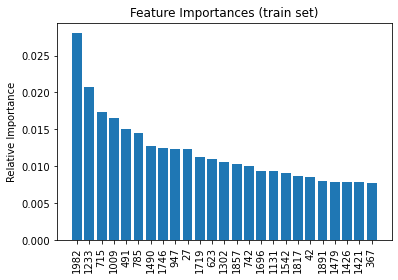

              precision    recall  f1-score   support

           0       0.88      1.00      0.93         7
           1       1.00      0.99      1.00       110

    accuracy                           0.99       117
   macro avg       0.94      1.00      0.96       117
weighted avg       0.99      0.99      0.99       117



In [54]:
#get the index of the features (of RDkit fingerprint) that were important
importances = rf.feature_importances_
featurenums = np.array([str(x).zfill(2) for x in range(len(importances))])
indices = np.argsort(importances)[::-1][0:25]#get the 25 most important features
plt.title('Feature Importances (train set)')
plt.bar(range(len(indices)), importances[indices], align='center')
plt.ylabel('Relative Importance')
plt.xticks(range(len(indices)), featurenums[indices], rotation=90)
plt.show()
#output metrics
print(classification_report(y_test, y_pred))
